In [1]:
import pickle_funcs as pk
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
%matplotlib inline 

In [2]:
data = pk.unpickle_object('clean_data')
data = data[data['2010 Census Population'] < 50000]
data = data[data['2010 Census Population'] > 5000]

In [3]:
westlimit=-127.53; southlimit=24.17; eastlimit=-63.19; northlimit=50.32
mid_lat = abs(westlimit - eastlimit)*0.5
mid_lon = abs(northlimit - southlimit)*0.5

In [4]:
%%capture
fig, ax = plt.subplots(figsize=(100,200));

In [5]:
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=mid_lat, lon_0=mid_lon,
            llcrnrlon=westlimit, llcrnrlat=southlimit, urcrnrlon=eastlimit, urcrnrlat=northlimit)

[96.0, 64.0]


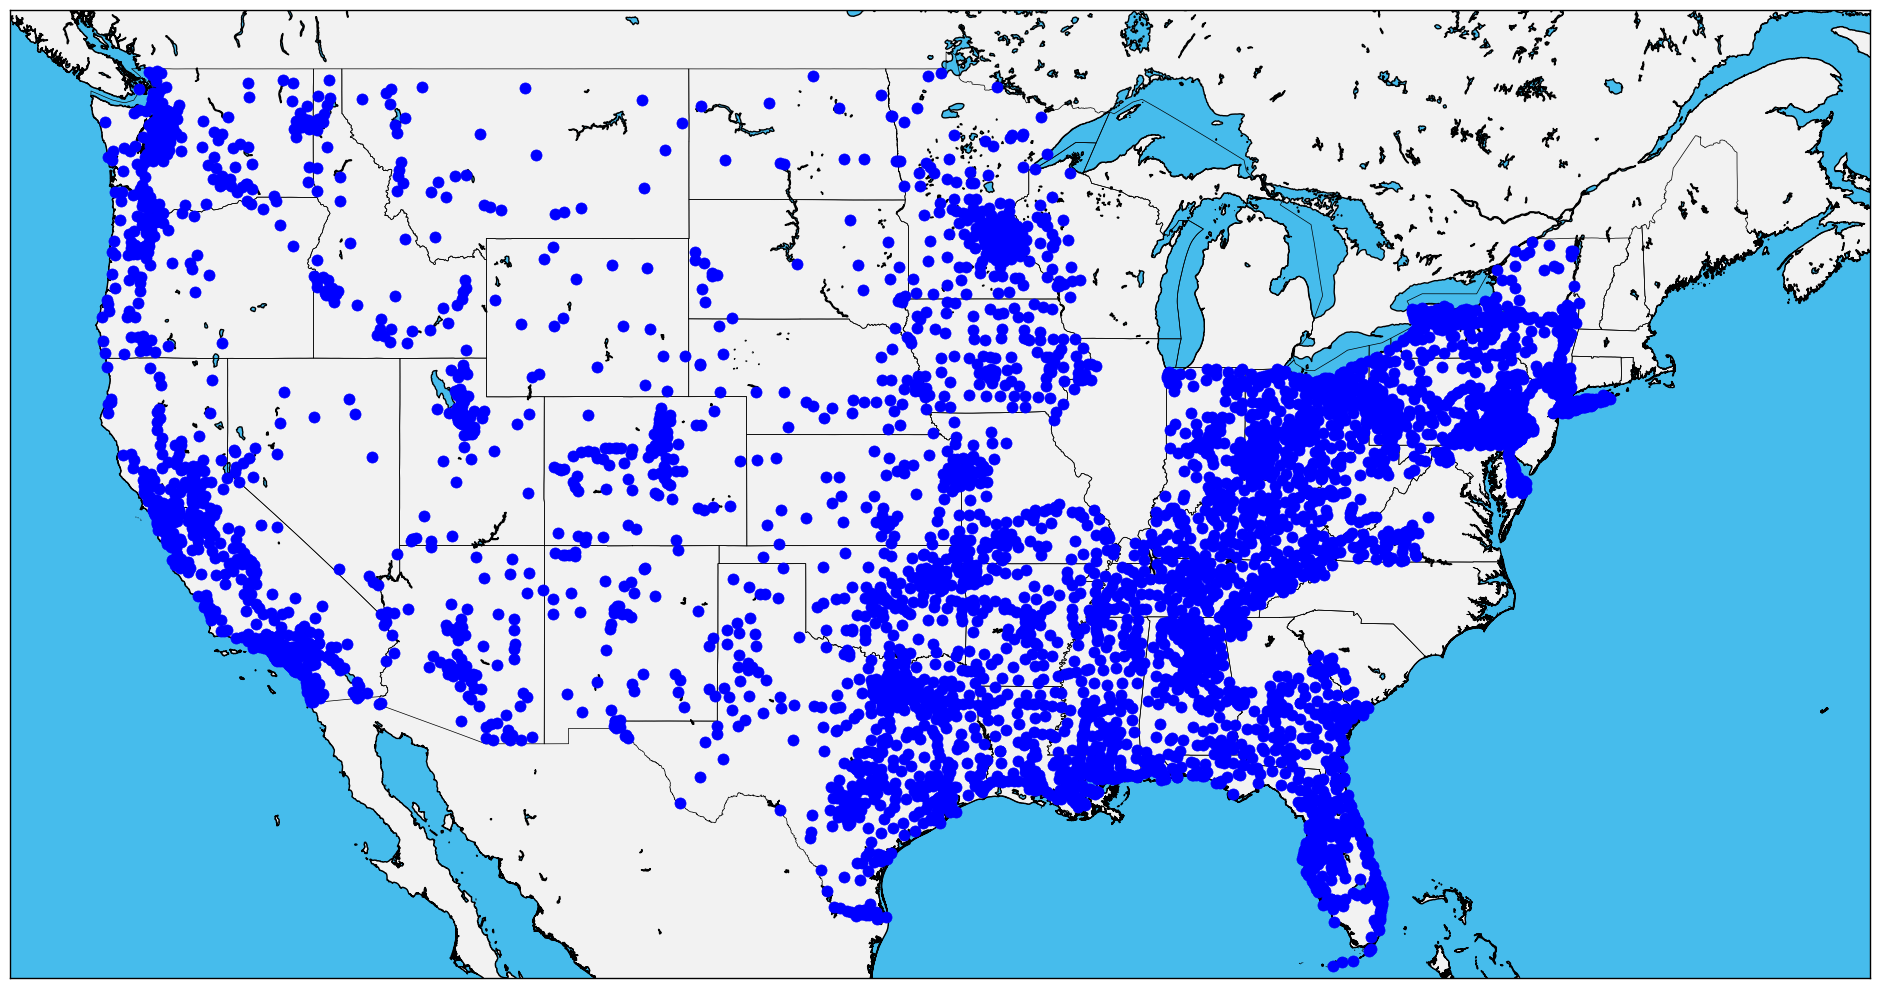

In [9]:
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('statesp020', 'statesp020')
x,y = m(list(data['lons']), list(data['lats']))
m.plot(x,y,'.', markersize='16')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0]*4
fig_size[1] = fig_size[1]*4
plt.rcParams["figure.figsize"] = fig_size
print(plt.rcParams["figure.figsize"])

plt.savefig('filename.png', bbox_inches=0)

In [7]:
data.describe()

,Zip Code ZCTA,2010 Census Population
count,5240.000000,5240.000000
mean,53800.054771,16198.798282
std,28005.682824,10853.814989
min,10001.000000,5001.000000
25%,32326.250000,7540.250000
50%,47111.500000,12388.000000
75%,78066.000000,22156.000000
max,99901.000000,49978.000000
